In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import statistics as stats
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
from numba import jit
import timeit
%matplotlib inline


import force
import timestep
import init
from HeatC import CV
from simulation import simulate
from thermostat import thermostat
from corrg import correlation

### Constants

In [24]:
#preferrably unvariable
L = 6 #number of unit cells in 3 directions
Z = 4 #number of atoms per unit cell
N = Z*L**3 #number of atoms in total space


## input parameters
rho = 0.85 #density of particles
T = 0.8

## parameters that are influenced by input parameters
l = (Z/rho)**(1/3) #unit cell length in sigma
ld = L*l #computational domain length

## Verlet units
Time = np.array([250]) #timesteps
dt = 0.004 #length of timestep
lt = 200 #amount of timesteps to thermostate

## for the correlation function
bins = 50
VN = ld*ld*ld /(N*N)
maxs = np.linspace(0,ld,num=bins)
dmaxs = maxs[1]-maxs[0]


## initialize vector
#Ki = np.zeros(shape=(Time,2))
#Energyi = np.zeros(shape=(Time,2))
Cv = np.zeros(shape=(len(Time),))
g = np.zeros(shape=(bins,))

## Computation of Cv

In [ ]:
for i in range((len(Time))):
    r = init.position(l,N,L) #initialize particles
    v = init.velocity(T,N) #initialize speed
    acc, V = force.FljArgon(r,ld,N) #initialize forces and potential energy
               
    K, Energy, r, g = simulate(Time[i],dt,r,v,acc,V,ld,N,T,lt,bins,VN,maxs,dmaxs)
    Cv[i] = CV(lt,K,N)
    
# fig = plt.figure()
# ax = fig.add_subplot(121, projection='3d')
# ax.scatter(r[:,0],r[:,1],r[:,2])
# ax = fig.add_subplot(122)
# ax.plot(Energy)

(0, 4)

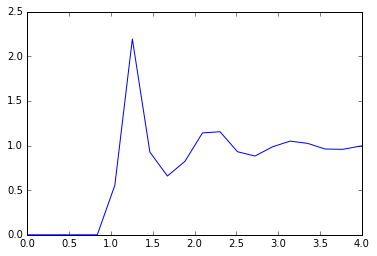

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(dr2)
ax.plot(maxs,g/(Time-lt))
plt.xlim([0,4])